# TOPICS SENTIMENT ANALYSIS 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

ytbr = "brancoala"
path = f"../data/{ytbr}/"
img_path = f"{path}imgs/"

## code

In [14]:
current = "all_communities"
df = pd.read_csv(f"{path}topics_sentiment_{current}_{ytbr}.csv").drop(['Unnamed: 0'], axis=1)

In [15]:
total_comments = df['sentiment'].count()

sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / total_comments) * 100

sentiment_counts_per_community = df.groupby('community')['sentiment'].value_counts().unstack(fill_value=0)

sentiment_percentages_per_community = sentiment_counts_per_community.div(sentiment_counts_per_community.sum(axis=1), axis=0) * 100

# print(sentiment_counts)

# print(sentiment_percentages)
# print(sentiment_counts_per_community)

# print(sentiment_percentages_per_community)

<Figure size 2000x1200 with 0 Axes>

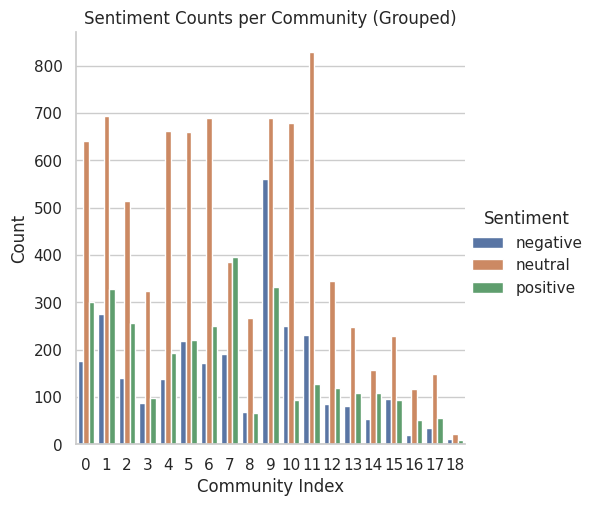

In [16]:
plot_df = sentiment_counts_per_community.reset_index().melt(id_vars='community', var_name='Sentiment', value_name='Count')
# plot_df = plot_df[plot_df["community"].isin([12,1,11,7,2])]

# Plotting
plt.figure(figsize=(20, 12))
sns.catplot(x='community', y='Count', hue='Sentiment', data=plot_df, kind='bar')
plt.title('Sentiment Counts per Community (Grouped)')
plt.xlabel('Community Index')
plt.ylabel('Count')
# plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.tight_layout()
plt.show()
# plt.savefig(f"{img_path}sentiment_counts_per_community_{current}.png")

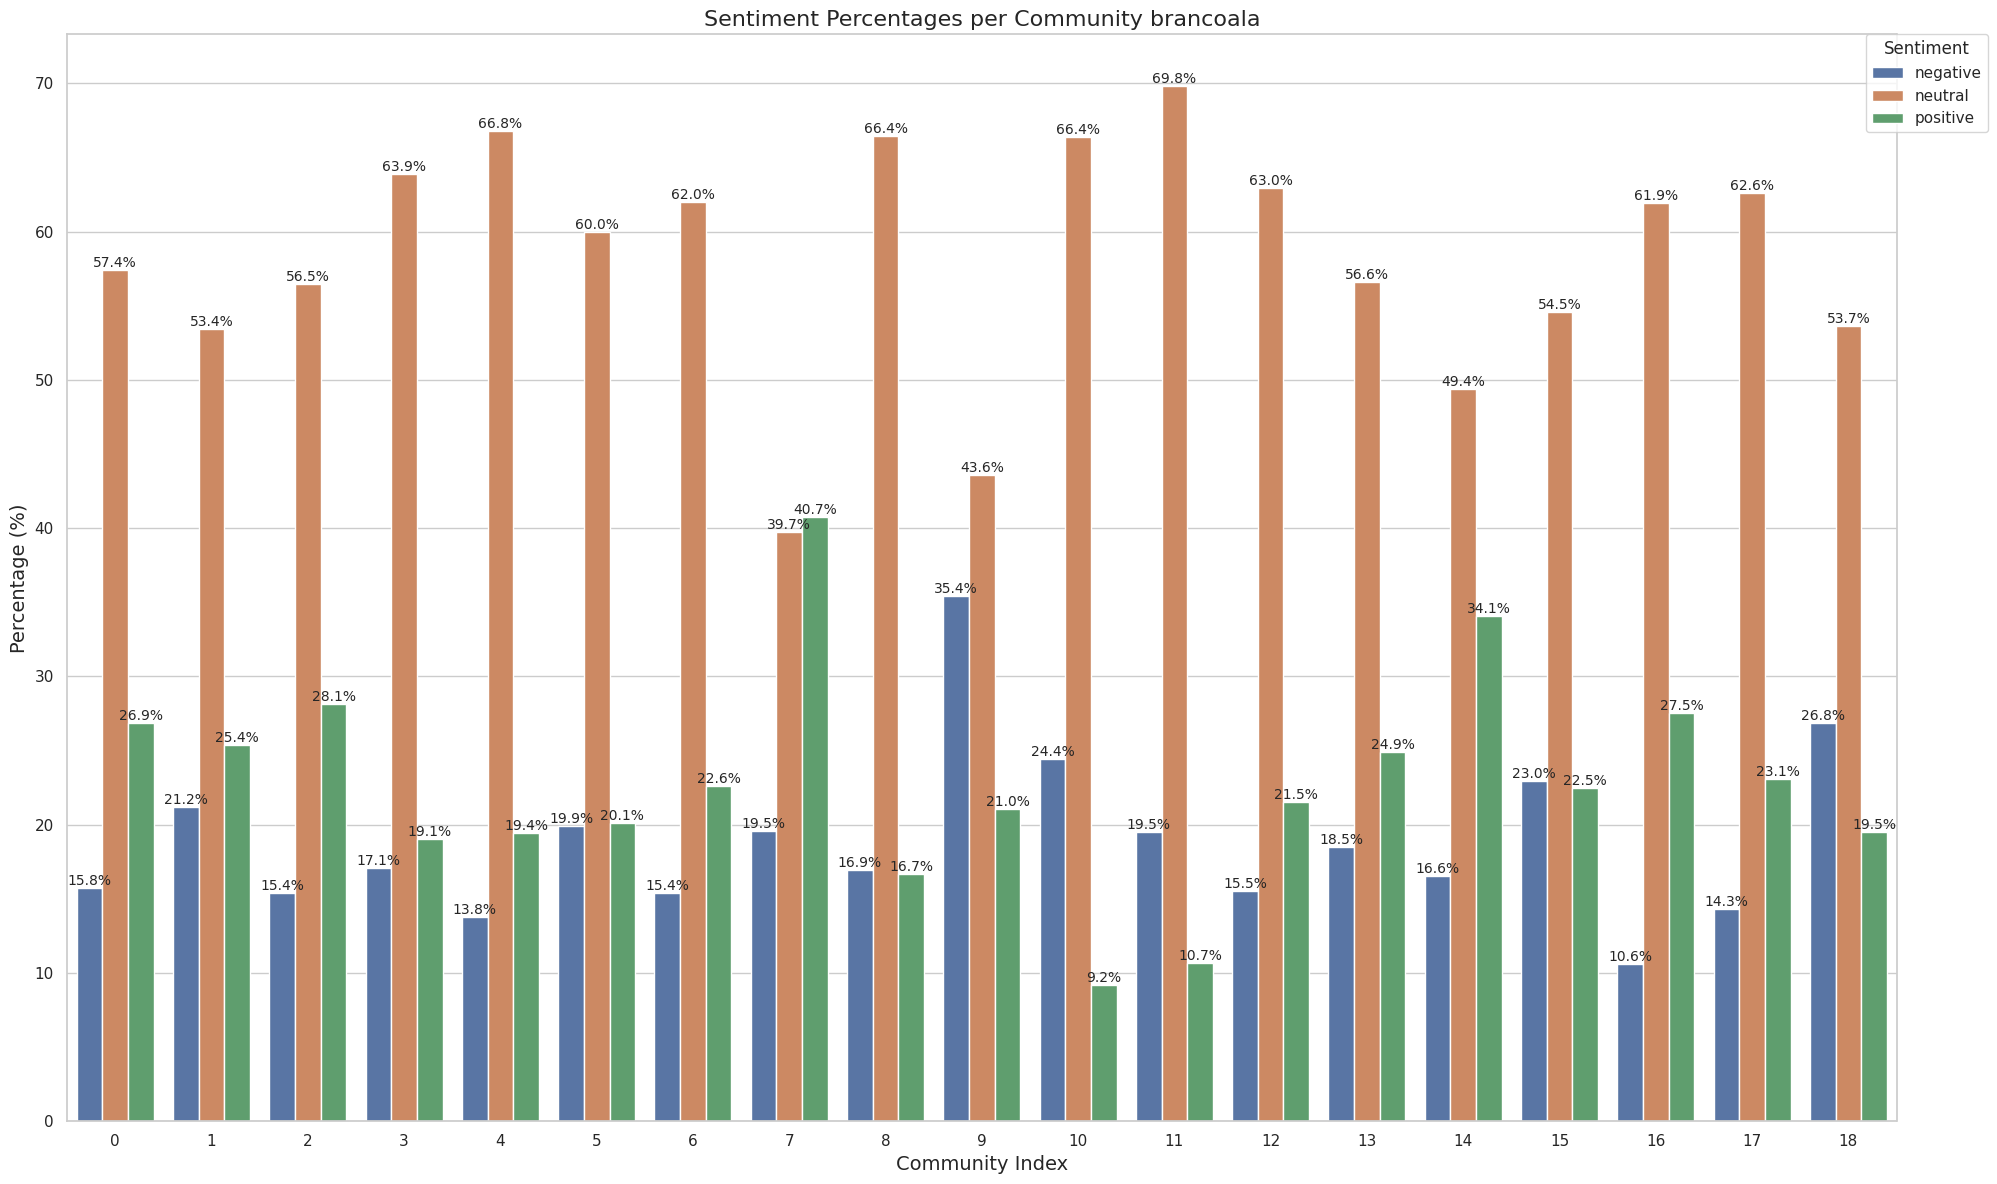

In [17]:
sentiment_percentages_per_community = sentiment_counts_per_community.div(sentiment_counts_per_community.sum(axis=1), axis=0) * 100

plot_df_percentages = sentiment_percentages_per_community.reset_index().melt(
    id_vars='community', var_name='Sentiment', value_name='Percentage'
)

plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
sns.barplot(
    x='community',
    y='Percentage',
    hue='Sentiment',
    data=plot_df_percentages,
    errorbar=None
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

plt.title(f'Sentiment Percentages per Community {ytbr}', fontsize=16)
plt.xlabel('Community Index', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
plt.tight_layout()

plt.savefig(f"{img_path}sentiment_percentages_per_community_{current}.png")


## Word Cloud

In [99]:
def plot_word_cloud(text, title, save=False, _path=""):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    if save:
        plt.savefig(f"{_path}")
    plt.show()

In [100]:
df_negative_communities = df[df['community'].isin([12])]
df_negative_communities = df_negative_communities[df_negative_communities['sentiment'].isin(['negative'])]

In [101]:
df_negative_communities['comment_text_cleaned'] = df_negative_communities['comment_text_cleaned'].replace(
    {'iso': 'isso', 'esa': 'essa', 'ese': 'esse', 'pesoa':'pessoa', 'asim':'assim', 
     'iritar':'irritar', 'iritado':'irritado', 'iritei':'irritei'}, 
    regex=True
)

df_negative_communities['comment_text_cleaned'] = df_negative_communities['comment_text_cleaned'].str.replace(
    r'\b(sim|nao|pq|ta|isso|pra|ja|vc)\b', '', regex=True
)



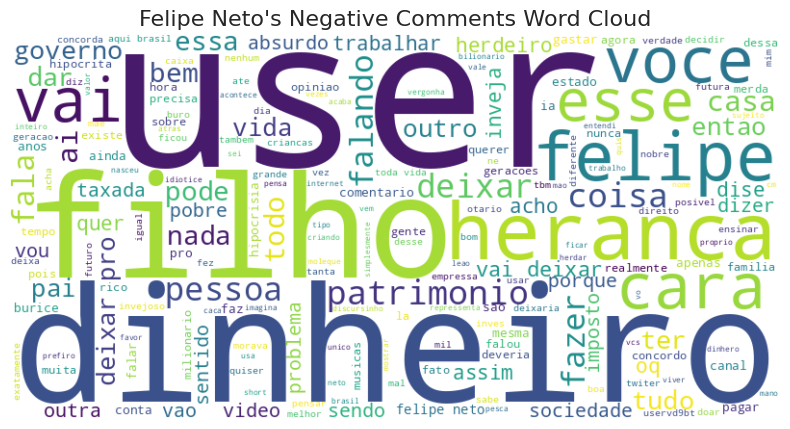

In [104]:
negative_text = " ".join(df_negative_communities['comment_text_cleaned'])

# plot_word_cloud(positive_text, 'Positive Comments Word Cloud', True, f"{img_path}positive_comments.png" )
plot_word_cloud(negative_text, "Felipe Neto's Negative Comments Word Cloud", True, f"{img_path}negative_comments.png" )